## Loan Prediction

<a href='https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About'>Link</a> to competition

Problem: Binary Classification of the loan status (Y/N)

Classification algorithms : Logistic Regression, Random Forrest, Naive Bayes

In [73]:
# imputs
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier

import xgboost as xgb

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

import pickle


import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
# LOAD DATA
# test = pd.read_csv('https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv')
# train = pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv')
# sample = pd.read_csv('https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_49d68Cx.csv')

In [3]:
# SAVE DATA LOCALLY
# test.to_csv('data/test.csv', index=False)
# train.to_csv('data/train.csv', index=False)
# sample.to_csv('data/sample.csv', index=False)

In [91]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
sample = pd.read_csv('data/sample.csv')

### Assess the data

In [13]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [25]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [88]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# check for duplicated rows 
train.duplicated().sum()

0

In [35]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [36]:
train.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002898,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [22]:
train_type_object = train.select_dtypes(include='object')

In [23]:
train_type_object

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [40]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

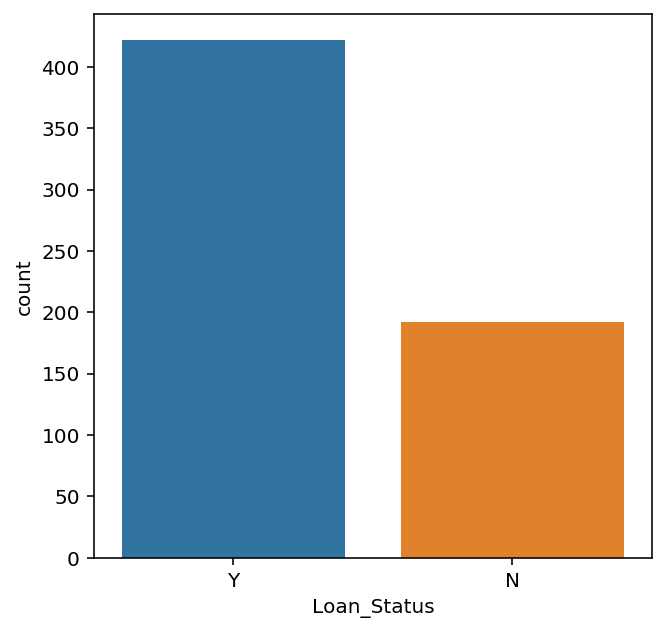

In [44]:
plt.subplots(figsize=(5,5))
sns.countplot(train.Loan_Status);

#### Assessment summary:
- both train and test have missing values 
- both have cartegorical and unstructured data which need preprocessing before model training and testing
- the variable of interest `Loan_Status` is quite imbalanced
    - final evaluation metric: roc_auc

##### ToDo
- replace missing values
- make dummy variables for `Gender`, `Married`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status`
- remove `Loan_ID`

### Feature assessment
Which features should be included in the model?
#### Numerical features
##### Visuall assessment

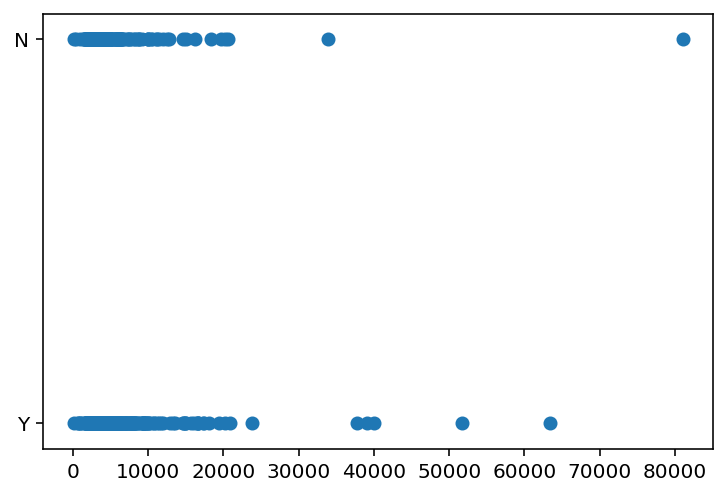

In [46]:
plt.scatter(x=train.ApplicantIncome, y=train.Loan_Status);

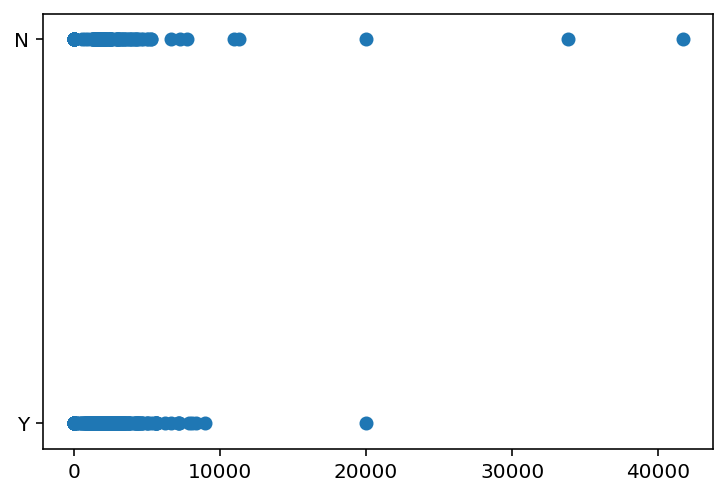

In [47]:
plt.scatter(x=train.CoapplicantIncome, y=train.Loan_Status);

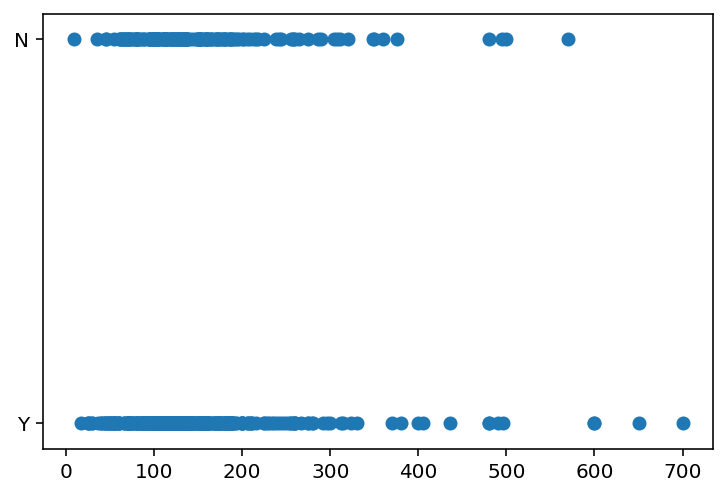

In [50]:
plt.scatter(x=train.LoanAmount, y=train.Loan_Status);

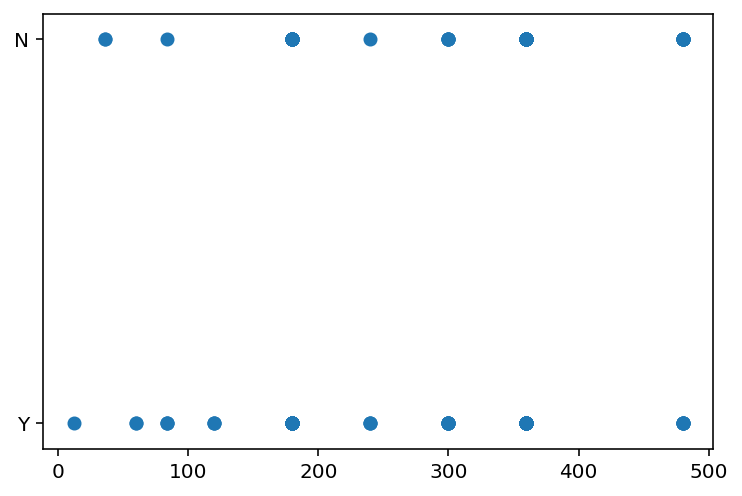

In [51]:
plt.scatter(x=train.Loan_Amount_Term, y=train.Loan_Status);

##### programmatic assessment

In [53]:
train.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [54]:
train.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


The only numerical feature that showed different patterns for Y and N is `CoapplicantIncome`. As you can see from the programmatic comparision between the Loan_Status. The rest of the numerical features aren't included in the model. 

#### Categorical features

In [56]:
train.select_dtypes('O').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


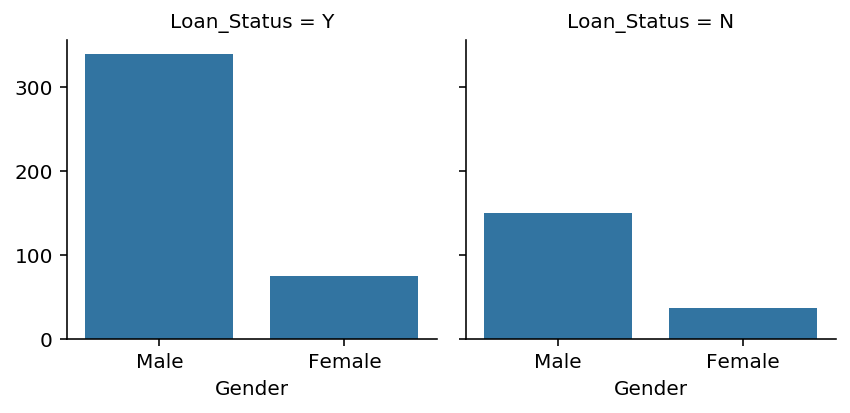

In [59]:
# Gender
grid = sns.FacetGrid(data=train, col='Loan_Status')
grid.map(sns.countplot, 'Gender');
# Gender has no infulence on Loan_Status

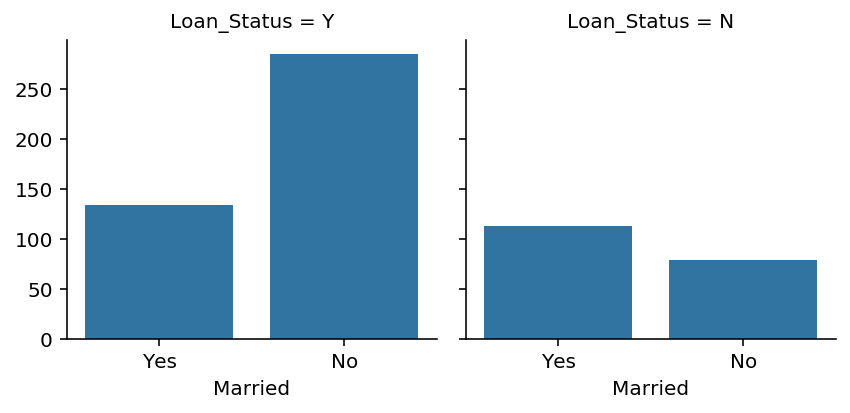

In [60]:
# Married
grid = sns.FacetGrid(data=train, col='Loan_Status')
grid.map(sns.countplot, 'Married');
# Married is a good feature

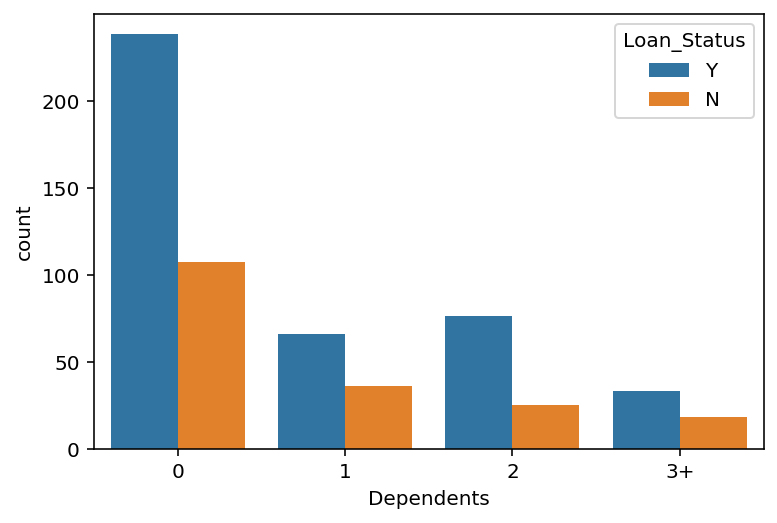

In [62]:
# Dependents
sns.countplot(data=train, x='Dependents', hue='Loan_Status');
# variability in the different kind of Dependents -> good feature

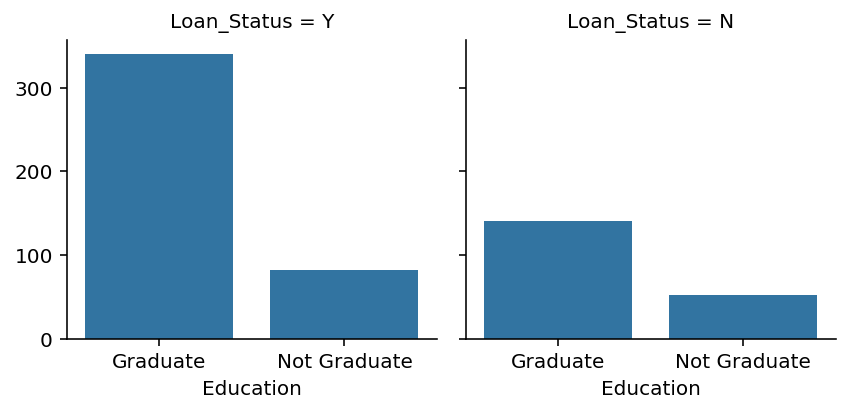

In [63]:
# Education
grid = sns.FacetGrid(data=train, col='Loan_Status')
grid.map(sns.countplot, 'Education');
# no differnce -> can de dropped from model

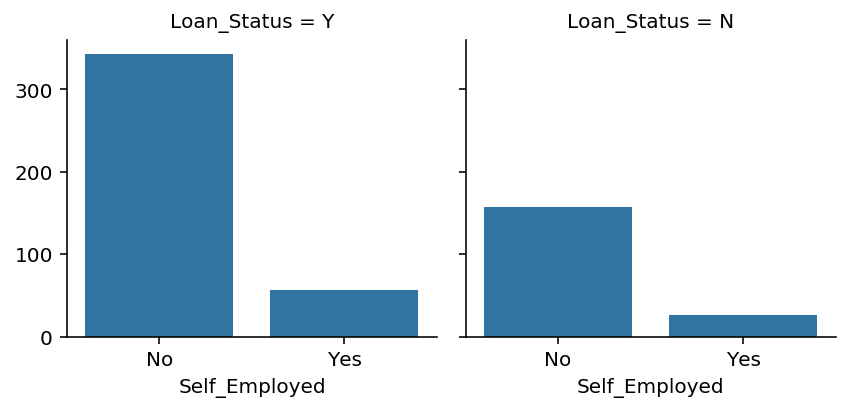

In [64]:
# Self Employed
grid = sns.FacetGrid(data=train, col='Loan_Status')
grid.map(sns.countplot, 'Self_Employed');
# no differnce -> can de dropped from model

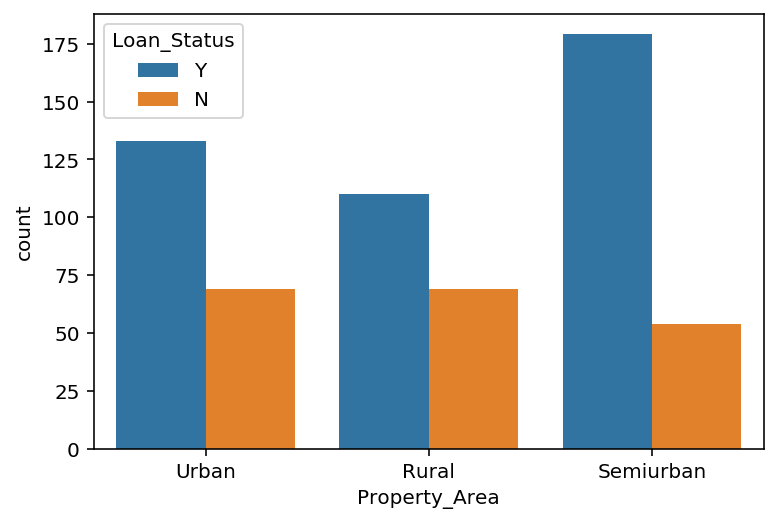

In [65]:
# Dependents
sns.countplot(data=train, x='Property_Area', hue='Loan_Status');
# variability between Property Areas -> good feature

#### Summary:
I will run two models one with all features and the other with the relevent ones from the visuall and programmatic assessment

### Cleaning

In [13]:
train_clean = train.copy()
test_clean = test.copy()

In [27]:
# remove missing values from datasets
# train_clean.dropna(inplace=True)
# test_clean.dropna(inplace=True)

In [14]:
train_clean.Gender.fillna('ffill', inplace=True)
train_clean.Married.fillna('ffill', inplace=True)

In [18]:
train_clean.Dependents.fillna('0', inplace=True)

In [19]:
train_clean.Self_Employed.fillna('No', inplace=True)
train_clean.LoanAmount.fillna(value=train_clean.LoanAmount.median(), inplace=True)
train_clean.Loan_Amount_Term.fillna(value=train_clean.Loan_Amount_Term.median(), inplace=True)
train_clean.Credit_History.fillna(1.0, inplace=True)

In [20]:
train_clean.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Credit_histrory should be an object

In [22]:
train_clean['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [98]:
train_clean['Credit_History'] = train_clean['Credit_History'].astype('O')

In [102]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


##### Create DataFrame for categorical features

In [103]:
cat_features = train_clean.select_dtypes('O')

In [106]:
cat_features.drop(columns='Loan_ID', inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
cat_features = pd.get_dummies(cat_features, drop_first=True)

In [110]:
num_features = train_clean.select_dtypes(exclude='O')

In [112]:
df = pd.concat([num_features, cat_features], axis=1)

In [113]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Married_ffill,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1,0,0,0,0,0,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1,1,0,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,0,1,0,0,1
610,4106,0.0,40.0,180.0,1,1,0,0,0,1,0,0,1,0,0,1
611,8072,240.0,253.0,360.0,1,1,0,1,0,0,0,0,1,0,1,1
612,7583,0.0,187.0,360.0,1,1,0,0,1,0,0,0,1,0,1,1


### Cleaning function

In [96]:
def clean(df):
    '''
    function that cleans the dataset 
    
    Input
        df: pandas DataFrame
        
    Return
        df: cleand DataFrame, ready for model taining
    '''
    # deal with missing values
    df.Gender.fillna(method='ffill', inplace=True)
    df.Married.fillna(method='ffill', inplace=True)
    
    df.Dependents.fillna('0', inplace=True)
    df.Self_Employed.fillna('No', inplace=True)
    df.LoanAmount.fillna(value=df.LoanAmount.median(), inplace=True)
    df.Loan_Amount_Term.fillna(value=df.Loan_Amount_Term.median(), inplace=True)
    df.Credit_History.fillna(1.0, inplace=True)
    
    df['Credit_History'] = df['Credit_History'].astype('O')
    
    
    df_cat_features = df.select_dtypes('O')
    df_cat_features.drop(columns='Loan_ID', inplace=True)
    df_cat_features = pd.get_dummies(df_cat_features, drop_first=True, prefix=df_cat_features.columns)
    
    df_num_features = df.select_dtypes(exclude='O')
    
    df = pd.concat([df_num_features, df_cat_features], axis=1)
    
    return df

In [97]:
df = clean(train)

In [98]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1,0,0,0,0,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,1,0,0,1
610,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,1,0,0,1
611,8072,240.0,253.0,360.0,1,1,1,0,0,0,0,1,0,1,1
612,7583,0.0,187.0,360.0,1,1,0,1,0,0,0,1,0,1,1


### Feature Engineering
it is possible to create new featureas or replace 'old' features using features and domain knowledge. In the following step I will create three new features:
- Total Income: ApplicantIncome + CoapplicantIncome 
- EMI: ratio between Loan_Amount_Term and LoanAmount
- Balance Income: income left after the EMI

##### Total Income

In [6]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

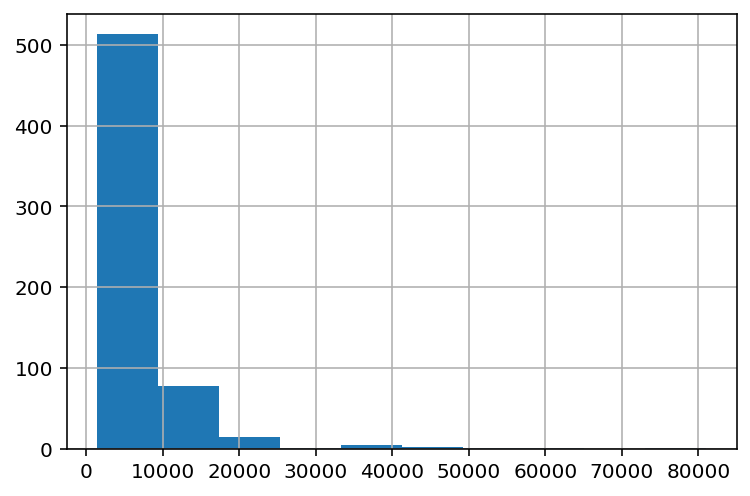

In [7]:
df['TotalIncome'].hist()

In [8]:
# we need to log it, because it is right skewed
df['TotalIncomeLog'] = np.log(df['TotalIncome']) 

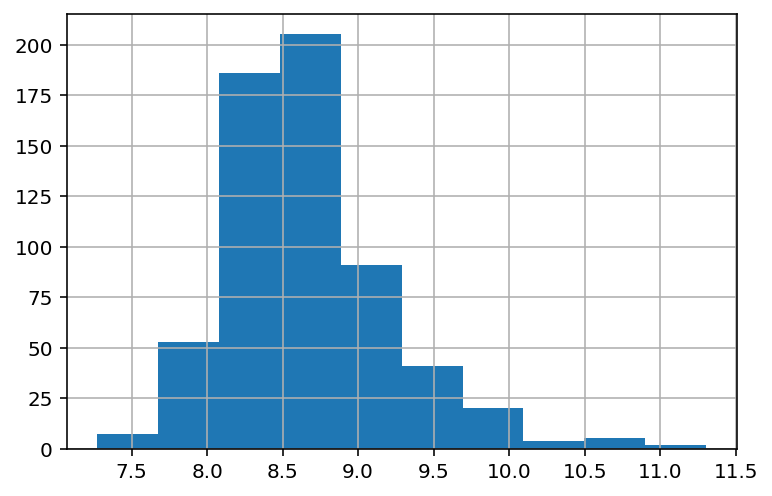

In [9]:
df.TotalIncomeLog.hist()

##### EMI

In [10]:
df['EMI'] = df['LoanAmount']/df['Loan_Amount_Term']

##### Balance Income

In [11]:
df['BalanceIncome'] = df['TotalIncome']-(df['EMI']*1000)

In [12]:
##### drop base columns to aviode high correlated features

In [13]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Credit_History_1.0', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_Y', 'TotalIncome', 'TotalIncomeLog',
       'EMI', 'BalanceIncome'],
      dtype='object')

In [14]:
# remove base features
df_model = df[['TotalIncomeLog', 'EMI', 'BalanceIncome', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 
               'Education_Not Graduate','Self_Employed_Yes', 'Credit_History_1.0', 'Property_Area_Semiurban','Property_Area_Urban', 
               'Loan_Status_Y']]

In [61]:
df_model

,TotalIncomeLog,EMI,BalanceIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,8.674026,0.355556,5493.444444,1,0,0,0,0,0,0,1,0,1,1
1,8.714568,0.355556,5735.444444,1,1,1,0,0,0,0,1,0,0,0
2,8.006368,0.183333,2816.666667,1,1,0,0,0,0,1,1,0,1,1
3,8.505323,0.333333,4607.666667,1,1,0,0,0,1,0,1,0,1,1
4,8.699515,0.391667,5608.333333,1,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972466,0.197222,2702.777778,0,0,0,0,0,0,0,1,0,0,1
610,8.320205,0.222222,3883.777778,1,1,0,0,1,0,0,1,0,0,1
611,9.025456,0.702778,7609.222222,1,1,1,0,0,0,0,1,0,1,1
612,8.933664,0.519444,7063.555556,1,1,0,1,0,0,0,1,0,1,1


### Model

1. test different Classifiers
    - for evaluation I will use roc_auc score, because the data is imbalanced
2. do a gridserach for the best classifier
3. run a model only with the specific features (from the assessment) 

In [15]:
# create features and variable of interest
X = df_model.iloc[:, :-1]
y = df_model.iloc[:, -1]

In [18]:
# define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'xgboost':xgb.XGBClassifier(objective="binary:logistic", random_state=42)
}

In [19]:
# wirte ML pipeline
def ml_pipeline(models, X, y):
    '''
    Input
        model: dict with classifiers
        X: features
        y: label
        
    Output
        classifiaction report for each model
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    for name, model in classifiers.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(name, ':')
        print(confusion_matrix(y_test, y_pred))
        print(roc_auc_score(y_test, y_pred))
        print('-'*55)

In [20]:
ml_pipeline(classifiers, X, y)

LogisticRegression :
[[21 17]
 [ 1 84]]
0.7704334365325077
-------------------------------------------------------
KNeighborsClassifier :
[[ 6 32]
 [10 75]]
0.5201238390092879
-------------------------------------------------------
SVC :
[[ 0 38]
 [ 0 85]]
0.5
-------------------------------------------------------
DecisionTreeClassifier :
[[27 11]
 [20 65]]
0.7376160990712075
-------------------------------------------------------
RandomForestClassifier :
[[25 13]
 [ 7 78]]
0.7877708978328173
-------------------------------------------------------
AdaBoostClassifier :
[[24 14]
 [ 4 81]]
0.7922600619195046
-------------------------------------------------------
GradientBoostingClassifier :
[[22 16]
 [ 8 77]]
0.7424148606811145
-------------------------------------------------------
xgboost :
[[23 15]
 [ 8 77]]
0.7555727554179565
-------------------------------------------------------


The best classifier is the AdaBoostClassifier with a roc_auc score of 0.792 followed by the LogisticRegression with 0.77. Since we were just uning one instance of training and testing, in the next step I will perfome a cross validation and look at the mean score.

In [21]:
estimator_cross_val = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier()
}

In [22]:
scv = StratifiedKFold(n_splits=10)

In [23]:
def cross_val(models, X, y):
    for name, model in estimator_cross_val.items():
        score = cross_val_score(estimator=model, X=X, y=y, scoring='roc_auc', cv=scv)
        print(name, ':')
        print(score.mean())
        print(score.max(), score.min())
        print('-'*50)

In [24]:
cross_val(estimator_cross_val, X, y)

LogisticRegression :
0.7570171067202891
0.8583959899749374 0.6726190476190476
--------------------------------------------------
AdaBoostClassifier :
0.7268059684093957
0.8274173806609546 0.6456548347613219
--------------------------------------------------


After performing k-fold cross validation it becomse clear that the LogisticRegression performes better overall. In the next step I will do hyperparameter tuning to get the best paramaters for the LogisticRegression.

### Hyperparameter tuning

In [25]:
hyper_params = {
    'C' : [1, 10, 100],
    'max_iter': [50, 100, 150],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

In [26]:
svc = StratifiedKFold(n_splits=5)

In [27]:
clf = GridSearchCV(estimator = LogisticRegression(), 
             param_grid = hyper_params, 
             scoring = 'roc_auc', 
             n_jobs=-2, 
             verbose=10, 
             cv=svc
            )

In [28]:
clf.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-2)]: Batch computation too fast (0.1708s.) Setting batch_size=2.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-2)]: Batch computation too fast (0.1383s.) Setting batch_size=4.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-2)]: Batch computation too fast (0.1198s.) Setting batch_size=8.
[Parallel(n_jobs=-2)]: Done  56 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed:    2.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-2,
             param_grid={'C': [1, 10, 100], 'max_iter': [50, 100, 150],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='roc_auc', verbose=10)

In [29]:
clf.best_estimator_

LogisticRegression(C=100, max_iter=50)

In [30]:
clf.best_score_

0.7723030615755074

### Train the best model on the entire training set

In [31]:
final_clf = LogisticRegression(C=100, max_iter=50)

In [32]:
final_clf.fit(X, y)

LogisticRegression(C=100, max_iter=50)

To make the prediction I need to make the same cleaning and feature engineering steps as before

In [75]:
# we can use the function from above and edit it a bit 
def clean_feature_engineering(df):
    '''
    function that cleans the dataset and adds new features
    
    Input
        df: pandas DataFrame
        
    Return
        df: cleand DataFrame, ready for model taining
    '''
    # get load id
    test_id = df['Loan_ID']
    df.drop(columns='Loan_ID', inplace=True)
    
    # missing values
    df.Gender.fillna(method='ffill', inplace=True)
    df.Married.fillna(method='ffill', inplace=True)
    
    df.Dependents.fillna('0', inplace=True)
    df.Self_Employed.fillna('No', inplace=True)
    df.LoanAmount.fillna(value=df.LoanAmount.median(), inplace=True)
    df.Loan_Amount_Term.fillna(value=df.Loan_Amount_Term.median(), inplace=True)
    df.Credit_History.fillna(1.0, inplace=True)
    
    df['Credit_History'] = df['Credit_History'].astype('O')
    
    # get cat features
    df_cat_features = df.select_dtypes('O')
    df_cat_features = pd.get_dummies(df_cat_features, drop_first=True, prefix=df_cat_features.columns)
    
    df_num_features = df.select_dtypes(exclude='O')
    
    df = pd.concat([df_num_features, df_cat_features], axis=1)
    
    # feature engineering
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['TotalIncomeLog'] = np.log(df['TotalIncome']) 
    
    df['EMI'] = df['LoanAmount']/df['Loan_Amount_Term']
    df['BalanceIncome'] = df['TotalIncome']-(df['EMI']*1000)
    
    df_test = df[['TotalIncomeLog', 'EMI', 'BalanceIncome', 'Gender_Male', 'Married_Yes', 'Dependents_1','Dependents_2', 
                  'Dependents_3+', 'Education_Not Graduate','Self_Employed_Yes', 'Credit_History_1.0', 'Property_Area_Semiurban',
                  'Property_Area_Urban']]
    
    return df_test, test_id

In [34]:
test_df, test_id = clean_feature_engineering(test)

In [35]:
preds = final_clf.predict(test_df)

In [36]:
len(test_id), len(preds)

(367, 367)

In [37]:
sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [38]:
submission_id = pd.DataFrame(test_id)

In [39]:
submission_preds = pd.DataFrame(preds)

In [40]:
submission = pd.concat([submission_id, submission_preds], axis=1)

In [41]:
submission.rename(columns={0: 'Loan_Status'}, inplace=True)

In [42]:
submission['Loan_Status'] = submission['Loan_Status'].replace(0,'N').replace(1,'Y')

In [43]:
submission.to_csv('submission_1.csv', index=False)

final score of 0.78

#### train and save model for web app

to use it in a web app we need to remove credit history, since it is an internal variable that the user doesn't know

In [107]:
train_clean = train.copy()
train_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [100]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [104]:
def clean_and_feature(df):
    '''
    function that cleans the dataset 
    
    Input
        df: pandas DataFrame
        
    Return
        df: cleand DataFrame, ready for model taining
    '''
    # deal with missing values
    df.Gender.fillna(method='ffill', inplace=True)
    df.Married.fillna(method='ffill', inplace=True)
    
    df.Dependents.fillna('0', inplace=True)
    df.Self_Employed.fillna('No', inplace=True)
    df.LoanAmount.fillna(value=df.LoanAmount.median(), inplace=True)
    df.Loan_Amount_Term.fillna(value=df.Loan_Amount_Term.median(), inplace=True)
    
    
    df.drop(columns='Credit_History', inplace=True)
    
    df_cat_features = df.select_dtypes('O')
    df_cat_features.drop(columns='Loan_ID', inplace=True)
    df_cat_features = pd.get_dummies(df_cat_features, drop_first=True, prefix=df_cat_features.columns)
    
    df_num_features = df.select_dtypes(exclude='O')
    
    df = pd.concat([df_num_features, df_cat_features], axis=1)
    
    # feature engineering
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['TotalIncomeLog'] = np.log(df['TotalIncome']) 
    
    df['EMI'] = df['LoanAmount']/df['Loan_Amount_Term']
    df['BalanceIncome'] = df['TotalIncome']-(df['EMI']*1000)
    
    df = df[['TotalIncomeLog', 'EMI', 'BalanceIncome', 'Gender_Male', 'Married_Yes', 'Dependents_1','Dependents_2', 
                  'Dependents_3+', 'Education_Not Graduate','Self_Employed_Yes', 'Property_Area_Semiurban',
                  'Property_Area_Urban', 'Loan_Status_Y']]
    
    return df

In [108]:
df_train = clean_and_feature(train_clean)
df_train.head()

,TotalIncomeLog,EMI,BalanceIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,8.674026,0.355556,5493.444444,1,0,0,0,0,0,0,0,1,1
1,8.714568,0.355556,5735.444444,1,1,1,0,0,0,0,0,0,0
2,8.006368,0.183333,2816.666667,1,1,0,0,0,0,1,0,1,1
3,8.505323,0.333333,4607.666667,1,1,0,0,0,1,0,0,1,1
4,8.699515,0.391667,5608.333333,1,0,0,0,0,0,0,0,1,1


In [109]:
X_app = df_train.iloc[:, :-1]
y_app = df_train.iloc[:, -1]

In [110]:
X_app.shape, y_app.shape

((614, 12), (614,))

In [111]:
final_clf_app = LogisticRegression(C=100, max_iter=50)

In [112]:
final_clf_app.fit(X_app, y_app)

LogisticRegression(C=100, max_iter=50)

In [113]:
filename = 'final_class.sav'
pickle.dump(final_clf_app, open(filename, 'wb'))

In [114]:
# load model
# loaded_model = pickle.load(open(filename, 'rb'))